In [1]:
# import libraries
from IPython.display import Image  # for displaying images in markdown cells
import pandas as pd  # Dataframe manipulation
import numpy as np  # Arrays manipulation


In [2]:
%%html
<style>
table {align:left;display:block}  # to align html tables to left
</style> 

# Dataquest | Machine Learning Fundamentals <br/> <br/> Project Title: Predicting Car Prices

## 1) Introduction

#### Background:

Provided by: [Dataquest.io](https://www.dataquest.io/)

We'll explore the fundamentals of machine learning using the k-nearest neighbors algorithm.

We'll predict a car's market price using its attributes. 

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). 

Attribute | Attribute range
--- | ---
symboling | -3, -2, -1, 0, 1, 2, 3.
normalized-losses| continuous from 65 to 256.
make| alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
fuel-type| diesel, gas.
aspiration| std, turbo.
num-of-doors| four, two.
body-style| hardtop, wagon, sedan, hatchback, convertible.
drive-wheels| 4wd, fwd, rwd.
engine-location| front, rear.
wheel-base| continuous from 86.6 120.9.
length| continuous from 141.1 to 208.1.
width| continuous from 60.3 to 72.3.
height| continuous from 47.8 to 59.8.
curb-weight| continuous from 1488 to 4066.
engine-type| dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
num-of-cylinders| eight, five, four, six, three, twelve, two.
engine-size| continuous from 61 to 326.
fuel-system| 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
bore| continuous from 2.54 to 3.94.
stroke| continuous from 2.07 to 4.17.
compression-ratio| continuous from 7 to 23.
horsepower| continuous from 48 to 288.
peak-rpm| continuous from 4150 to 6600.
city-mpg| continuous from 13 to 49.
highway-mpg| continuous from 16 to 54.
price| continuous from 5118 to 45400.


In [3]:
# read and load file into dataframe
header = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

df = pd.read_csv('imports-85.data', names=header)

# review
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
# review datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### Findings (Introduction):

Numeric columns may be useful to use as training features in our KNN model, while the target feature would be the **'price'** column.

No null values are identified in the dataset.

## 2) Data Cleaning

Provided by: [Dataquest.io](https://www.dataquest.io/)

We usually can't have any missing values if we want to use them for predictive modeling. 

Based on the data set preview, we can tell that the normalized-losses column contains missing values represented using "?". 

Let's replace these values and look for the presence of missing values in other numeric columns. 

Let's also rescale the values in the numeric columns so they all range from 0 to 1 (ie. **normalisation**).

In [5]:
# to replace all of the '?' values
# df.replace({'normalized-losses':'?'}, {'normalized-losses':np.nan}, inplace=True)
df.replace(to_replace=r'\?', value=np.nan, regex=True, inplace=True)

# review null values
print(df.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [6]:
# review values of num_of_doors, maybe we can change it to numeric as well
print(df['num-of-doors'].value_counts(dropna=False))

df['num-of-doors'] = df['num-of-doors'].str.replace('four', '4').str.replace('two', '2')

# review
print(df['num-of-doors'].value_counts(dropna=False))

four    114
two      89
NaN       2
Name: num-of-doors, dtype: int64
4      114
2       89
NaN      2
Name: num-of-doors, dtype: int64


In [7]:
# review values of num-of-cylinders, maybe we can change it to numeric as well
# eight, five, four, six, three, twelve, two.

print(df['num-of-cylinders'].value_counts(dropna=False))

df['num-of-cylinders'] = df['num-of-cylinders'].str.replace('four', '4').str.replace('six', '6').str.replace('five', '5').str.replace('eight', '8').str.replace('two', '2').str.replace('three', '3').str.replace('twelve', '12')

# review
print(df['num-of-cylinders'].value_counts(dropna=False))

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64
4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64


In [8]:
# after cross check with attribute range description above, change those columns with new null values to numeric float

features_num = ['num-of-doors', 'num-of-cylinders', 'bore', 'stroke', 'normalized-losses', 'horsepower', 'peak-rpm', 'price']
df[features_num] = df[features_num].astype(float)

# review data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    float64
 16  engine-size        205 non

In [9]:
# review null values again
print(df.isnull().sum())

# for rows with missing values, let's drop them especially for 'normalized-losses' with substantial missing values as we may make misleading assumptions if we fill them up (eg. using average values)
df.dropna(axis=0, how='any', inplace=True)

# review null values
df.info()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    float64
 2   make               159 non-null    object 
 3   fuel-type    

In [10]:
# now, let's normalise all the columns with numeric data types (other than 'price', the target variable) for machine-learning training purposes later
features = ['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# z-score formula: z = (x - mean) / std_deviation
normalized_listings = (df - df.mean()) / (df.std())

# drop all the other columns that are not used
normalized_listings.dropna(axis=1, how='any', inplace=True)

# replace 'price' column back with unmodified values (not normalised)
normalized_listings['price'] = df['price'].copy()

# review
print(normalized_listings.info())
normalized_listings.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bore               159 non-null    float64
 1   city-mpg           159 non-null    float64
 2   compression-ratio  159 non-null    float64
 3   curb-weight        159 non-null    float64
 4   engine-size        159 non-null    float64
 5   height             159 non-null    float64
 6   highway-mpg        159 non-null    float64
 7   horsepower         159 non-null    float64
 8   length             159 non-null    float64
 9   normalized-losses  159 non-null    float64
 10  num-of-cylinders   159 non-null    float64
 11  num-of-doors       159 non-null    float64
 12  peak-rpm           159 non-null    float64
 13  price              159 non-null    float64
 14  stroke             159 non-null    float64
 15  symboling          159 non-null    float64
 16  wheel-base         159 non

,bore,city-mpg,compression-ratio,curb-weight,engine-size,height,highway-mpg,horsepower,length,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
3,-0.411938,-0.413638,-0.041428,-0.257580,-0.335724,0.176585,-0.322294,0.200645,0.363282,1.202423,-0.356727,0.818198,0.829113,13950.0,0.554950,1.059564,0.297218,0.304152
4,-0.411938,-1.397706,-0.555636,0.752917,0.550661,0.176585,-1.560840,0.623841,0.363282,1.202423,1.135894,0.818198,0.829113,17450.0,0.554950,1.059564,0.219810,0.406828
6,-0.411938,-1.233695,-0.427084,0.794415,0.550661,0.793662,-1.096385,0.461073,1.760466,1.034126,1.135894,0.818198,0.829113,17710.0,0.554950,0.221401,1.458340,2.973718
8,-0.636375,-1.561717,-0.478505,1.296551,0.386516,0.881816,-1.870477,1.437681,1.760466,1.034126,1.135894,0.818198,0.829113,23875.0,0.554950,0.221401,1.458340,2.973718
10,0.747653,-0.577650,-0.349953,-0.137233,-0.368553,0.176585,-0.477113,0.168091,0.380638,1.987808,-0.356727,-1.214512,1.473229,16430.0,-1.479723,1.059564,0.568146,-0.414577


## 3) Univariate Model

Let's start with some univariate k-nearest neighbors models (**default k = 5**; ie. pick 5 nearest neighbors wrt. each observation for each prediction point, for value prediction purposes)

Starting with simple models before moving to more complex models helps us structure the code workflow and understand the features better.

For cross-validation, let us apply the **'Holdout validation'** technique, where we split the dataset into half, then we cycle through them so that each half can be training set first and testing set later, or vice versa. 

This is a specific case of applying **K-Fold cross-validation** where k-fold factor is 2.

Refer [here](https://medium.datadriveninvestor.com/k-fold-cross-validation-6b8518070833) for another source for explanation on **K-Fold cross-validation**.

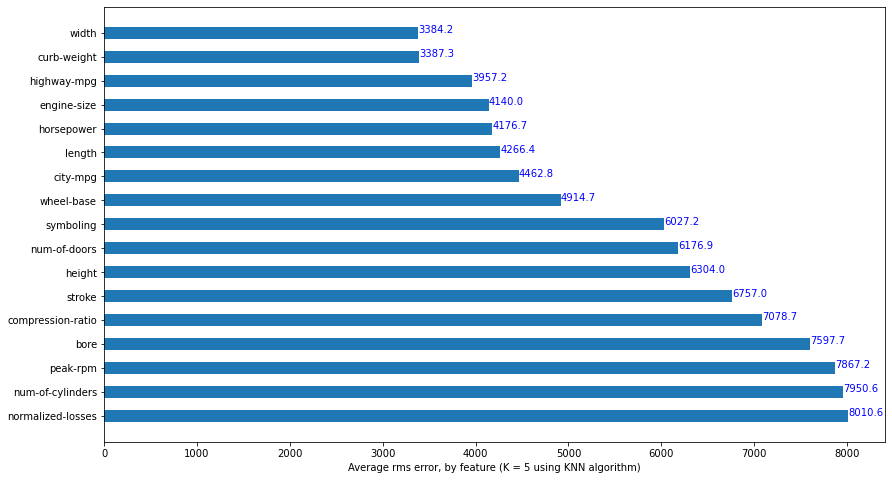

In [11]:
# Create a function, named knn_train_test() that encapsulates the training and simple validation process. This function should have 4 parameters -- training column name, target column name, the dataframe object, and the k variable for KNN model (k-Nearest Neighbours).
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


def knn_train_test(features, target, df, k):
    # let's split the dataset into 2 equal partitions and assign to train / test sets
    set_one = df[:int(len(df)/2)]
    set_two = df[int(len(df)/2):]
    train_one = set_one
    test_one = set_two
    train_two = set_two
    test_two = set_one
    
    # initiate knn objects
    knn_one = KNeighborsRegressor(n_neighbors=k, algorithm='auto')
    knn_two = KNeighborsRegressor(n_neighbors=k, algorithm='auto')
    
    # knn fit
    knn_one.fit(train_one[features], train_one[target])
    knn_two.fit(train_two[features], train_two[target])
    
    # knn predict
    predictions_one = knn_one.predict(test_one[features])
    predictions_two = knn_two.predict(test_two[features])
    
    # calculate error terms (mse)
    # defined features need to be in same order as test set (when computing errors, ie. mean_squared_error)
    mse_one = mean_squared_error(test_one['price'], predictions_one)
    mse_two = mean_squared_error(test_two['price'], predictions_two)
    rmse_one = abs(mse_one) ** (1/2)
    rmse_two = abs(mse_two) ** (1/2)
    
    # round them for presentability after mean
    avg_rmse = round(np.mean([rmse_one, rmse_two]),1)
    return avg_rmse

features = ['bore', 'city-mpg', 'compression-ratio', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'normalized-losses', 'num-of-cylinders', 'num-of-doors', 'peak-rpm', 'stroke', 'symboling', 'wheel-base', 'width']
target = ['price']

avg_rmses = []
for feature in features:
    feature = [feature]
    avg_rmse = knn_train_test(feature, target, df=normalized_listings, k=5)
    # test function
    # print(feature, rmse, avg_rmse)
    avg_rmses.append(avg_rmse)

# make a new dataframe using the 2 lists containing the results for ease of sorting and preesnting values
plot_df = pd.DataFrame(
    {'features': features,
     'avg_rmses': avg_rmses
    })    

plot_df.sort_values(by='avg_rmses', axis=0, ascending=False, inplace=True)

# plotting
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
ax.barh(plot_df['features'], width=plot_df['avg_rmses'], height=0.5)
for i, v in enumerate(plot_df['avg_rmses']):
    ax.text(v + 4, i, str(v), color='blue', fontweight='light')
ax.set_xlabel('Average rms error, by feature (K = 5 using KNN algorithm)')
plt.show()

#### Findings (Univariate Model - KNN's k=5):

Applying **KNN algorithm (K-Nearest Neighbor)** then validate it using **holdout validation** with the partitioned training and test sets.

The resulting average rmse (root mean squared error) is the lowest for the categories **'width', 'curb-weight'**.

What if we try out other KNN's k values and see the impact on the errors in test sets?

In [12]:
# what if we try out other k values and see the impact on the errors?

avg_rmses = []
for feature in features:
    feature = [feature]
    for i in [1,3,5,7,9]:
        avg_rmse = knn_train_test(feature, target, df=normalized_listings, k=i)
        # test function
        # print(feature, i, rmse, avg_rmse)
        avg_rmses.append(avg_rmse)
        

# Let's make the results into another dataframe for easy filtering plotting
# first generate the lists of other columns
plot_feature = []
plot_k = []
for feature in features:
    plot_feature = plot_feature + ([feature] * 5)
    plot_k = plot_k + ([1, 3, 5, 7, 9])
    
# then turn the lists into dataframe  
plot_df = pd.DataFrame(
    {'feature': plot_feature,
     'k': plot_k,
     'avg_rmses': avg_rmses}
    )

# review transformation
plot_df

,feature,k,avg_rmses
0,bore,1,8982.9
1,bore,3,7261.4
2,bore,5,7597.7
3,bore,7,7304.9
4,bore,9,6961.0
...,...,...,...
80,width,1,3808.4
81,width,3,3375.8
82,width,5,3384.2
83,width,7,3435.2


In [ ]:
# using the above data preparation, let's plot a grouped bar chart to visualise the different k values applied to each univariate category and the impact to avg_rmses
# source: https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/

# split df into 5 parts with different k values
k1 = plot_df[plot_df['k'] == 1]
k3 = plot_df[plot_df['k'] == 3]
k5 = plot_df[plot_df['k'] == 5]
k7 = plot_df[plot_df['k'] == 7]
k9 = plot_df[plot_df['k'] == 9]

# filter out only avg_rmses to input plotting later
y1 = k1['avg_rmses']
y2 = k3['avg_rmses']
y3 = k5['avg_rmses']
y4 = k7['avg_rmses']
y5 = k9['avg_rmses']

# create chart layout and each barchart value and location
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
ax.barh(y=np.arange(len(k1))+0.3, width=y1, height=0.1, label='k=1')
ax.barh(y=np.arange(len(k3))+0.2, width=y2, height=0.1, label='k=3')
ax.barh(y=np.arange(len(k5))+0.1, width=y3, height=0.1, label='k=5')
ax.barh(y=np.arange(len(k7)), width=y4, height=0.1, label='k=7')
ax.barh(y=np.arange(len(k9))-0.1, width=y5, height=0.1, label='k=9')

# set yticks location and labels
ax.set_yticks(np.arange(len(k1))+0.1)
ax.set_yticklabels(labels=k1['feature'])

# set xlabel
ax.set_xlabel('Average rms error, by feature (K = 1,3,5,7,9 using KNN algorithm)')

# label selected bar chart values directly on plot
for i, v in enumerate(k1['avg_rmses']):
    ax.text(v + 4, i+0.4, str(v), color='blue', fontweight='light', fontsize='small')
for i, v in enumerate(k9['avg_rmses']):
    ax.text(v + 4, i-0.325, str(v), color='blue', fontweight='light', fontsize='small')

# show legend and plot
ax.legend()
plt.show()

In [ ]:
# find out mean of price for reference to benchmark on whether the computed average error terms are considered large or small.
# {:,} to display commas for numeric data.
print('Mean price is ${:,}.'.format(round(df['price'].mean(),2)))

#### Findings (Univariate Model - KNN's k =1,3,5,7,9):

We expanded the selection of KNN's k factor to range of (1,3,5,7,9), while we are trying to optimise which KNN's k value is better to minimise our selected error term, **average rms error**.

From above grouped bar charts visualisation, it would appear that the error terms generally decreases (improves) when higher k factor in our range is applied for **univariate testing**, depending on the feature that is trained.

After varying the values of k, the resulting average rmse (root mean squared error) is still the lowest for the categories **'width', 'curb-weight'**.

## 4) Multivariate Model

Let's apply the **knn_train_test()** function we wrote in the last section to work with multiple columns (ie. **multivariate model**).

Generally, selecting **relevant** categories for multivariate testing can decrease (improve) the error terms for prediction purposes in the test sets.

Let's tweak the KNN model by adding in one training feature at a time, and review the error terms for each. We will use KNN's **default k factor of 5**.

In [ ]:
# review order of dataset columns
normalized_listings.columns

In [ ]:
# apply previous written function for multivariate models
# defined features need to be in same order as test set (when computing errors, ie. mean_squared_error) in the function, which is sourced from normalized_listings

# initial empty list to store results and plot later
rmses = []
target = ['price']

# select and apply 2 ranked relevant features based on the above univariate test that is ranked in order of avg error term
features = ['curb-weight', 'width']
rmse_two = knn_train_test(features, target, df=normalized_listings, k=5)
rmses.append(rmse_two)

# select and apply 3 ranked relevant features 
features = ['curb-weight', 'highway-mpg', 'width']
rmse_three = knn_train_test(features, target, df=normalized_listings, k=5)
rmses.append(rmse_three)

# select and apply 4 ranked relevant features
features = ['curb-weight', 'engine-size', 'highway-mpg', 'width']
rmse_four = knn_train_test(features, target, df=normalized_listings, k=5)
rmses.append(rmse_four)

# select and apply 5 ranked relevant features
features = ['curb-weight', 'engine-size', 'highway-mpg', 'horsepower', 'width']
rmse_five = knn_train_test(features, target, df=normalized_listings, k=5)
rmses.append(rmse_five)

# visualise
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
ax.plot(rmses)
ax.set_xticks(np.arange(0,4,1))
ax.set_xticklabels(labels=np.arange(2,6,1))
ax.set_title('Rms error, by number of features, (K = 5 using KNN algorithm)')
ax.set_xlabel('Number of features')
ax.set_ylabel('Rms error')

# scale y-axis limit from 0 for proper perspective
ax.set_ylim([0,4000])

plt.show()

# review results
print('rmse_two, rmse_three, rmse_four, rmse_five')
print(rmses)
print('It would appear the optimal number of features here is 2 with minimum error term.')

## 5) Hyperparameter Tuning

Let's now try optimize the models in the previous step.

We shall do that by tweaking KNN's k value on a range of k=1 to k=25.

In [ ]:
avg_rmses=[]

# select and apply 2 ranked relevant features, varying k
features = ['curb-weight', 'width']
rmses_two = []
for i in range(1,26,1):
    rmse_two = knn_train_test(features, target, df=normalized_listings, k=i)
    rmses_two.append(rmse_two)
avg_rmse_two = round(np.mean(rmses_two),1)
avg_rmses.append(avg_rmse_two)

# select and apply 3 ranked relevant features 
features = ['curb-weight', 'highway-mpg', 'width']
rmses_three = []
for i in range(1,26,1):
    rmse_three = knn_train_test(features, target, df=normalized_listings, k=i)
    rmses_three.append(rmse_three)
avg_rmse_three = round(np.mean(rmses_three),1)
avg_rmses.append(avg_rmse_three)

# select and apply 4 ranked relevant features
features = ['curb-weight', 'engine-size', 'highway-mpg', 'width']
rmses_four = []
for i in range(1,26,1):
    rmse_four = knn_train_test(features, target, df=normalized_listings, k=i)
    rmses_four.append(rmse_four)
avg_rmse_four = round(np.mean(rmses_four),1)
avg_rmses.append(avg_rmse_four)

# select and apply 5 ranked relevant features
features = ['curb-weight', 'engine-size', 'highway-mpg', 'horsepower', 'width']
rmses_five = []
for i in range(1,26,1):
    rmse_five = knn_train_test(features, target, df=normalized_listings, k=i)
    rmses_five.append(rmse_five)
avg_rmse_five = round(np.mean(rmses_five),1)
avg_rmses.append(avg_rmse_five)


# review
print(rmses_two, '\n')
print(rmses_three, '\n')
print(rmses_four, '\n')
print(rmses_five, '\n')
print(avg_rmses)

In [ ]:
# We want to find the optimal k value for each model to minimise the error terms.
# Hence, let's plot/visualise rmses of each k value from k=1 to k=25, for each model - try scatterplot.


# visualise
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
x_plot = np.arange(0,len(rmses_two),1)
y_plot = [rmses_two, rmses_three, rmses_four, rmses_five]

# multiple line graphs on one chart
for i, k in zip(range(2,6,1), y_plot):
    ax.plot(x_plot, k, alpha=0.5, label='number of features={}'.format(i))
# label minimum point on each line
for k in y_plot:
    ax.scatter(k.index(min(k)), min(k))
# just to show legend for minimum points
ax.scatter(rmses_five.index(min(rmses_five)), min(rmses_five), c='r', label='minimum')

ax.set_xticks(x_plot)
ax.set_xticklabels(labels=np.arange(1,26,1))
ax.set_title('Rms error, by number of features, (K = 1 to 25 using KNN algorithm)')
ax.set_xlabel("KNN's k-factor")
ax.set_ylabel('Rms error')

plt.legend()
plt.show()

# Getting min, error term and its k-factor from each feature model (where k-factor = index + 1)
print('Minimum error terms for each model:')
print('2-features model: min rmse={:,},'.format(min(rmses_two)), 'k={}'.format(rmses_two.index(min(rmses_two))+1))
print('3-features model: min rmse={:,},'.format(min(rmses_three)), 'k={}'.format(rmses_three.index(min(rmses_three))+1))
print('4-features model: min rmse={:,},'.format(min(rmses_four)), 'k={}'.format(rmses_four.index(min(rmses_four))+1))
print('5-features model: min rmse={:,},'.format(min(rmses_five)), 'k={}'.format(rmses_five.index(min(rmses_five))+1))

#### Findings (HyperParameter Tuning):

Based on the above findings, it would appear that the best model identified so far with the lowest root mean squared error (rmse) is the **5-features model where KNN's k-factor is 12 (rmse=2,936)**.


## 6) Alternative Approach: K-Fold Cross Validation illustrated on univariate model

We can also cross-validate KNN models using k-fold cross validation with different number of k-partitions (compared to above approach of holdout validation, which is a specific case of k-fold cross validation where number of partitions = 2).

In this case, we can try to vary how many partitions to minimise the error terms, while using the default KNN's k factor of 5 (ie. 5 nearest neighbours).

We illustrate the alternative above on a univariate model.

In [ ]:
# Create a function, named knn_train_test() that encapsulates the training and simple validation process. This function should have 4 parameters -- training column name, target column name, the dataframe object, and the k variable for KNN model (k-Nearest Neighbours).
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

def knn_train_test_kfold(features, target, df, k):
    model = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
    kf = KFold(k, shuffle=True, random_state=1)
    mses = cross_val_score(model, df[features], df[target], scoring='neg_mean_squared_error', cv=kf)
    rmse = abs(mses) ** (1/2)
    avg_rmse = rmse.mean()
    
    # round them for presentability
    rmse = np.round(rmse, 1)
    avg_rmse = np.round(avg_rmse, 1)
    return rmse, avg_rmse

features = ['bore', 'city-mpg', 'compression-ratio', 'curb-weight', 'engine-size', 'height', 'highway-mpg', 'horsepower', 'length', 'normalized-losses', 'num-of-cylinders', 'num-of-doors', 'peak-rpm', 'stroke', 'symboling', 'wheel-base', 'width']
target = ['price']

rmses = []
avg_rmses = []
for feature in features:
    feature = [feature]
    rmse, avg_rmse = knn_train_test_kfold(feature, target, df=normalized_listings, k=5)
    # test function
    # print(feature, rmse, avg_rmse)
    rmses.append(rmse)
    avg_rmses.append(avg_rmse)

# make a new dataframe using the 2 lists containing the results for ease of sorting and preesnting values
plot_df = pd.DataFrame(
    {'features': features,
     'avg_rmses': avg_rmses
    })    

plot_df.sort_values(by='avg_rmses', axis=0, ascending=False, inplace=True)

# plotting
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
ax.barh(plot_df['features'], width=plot_df['avg_rmses'], height=0.5)
for i, v in enumerate(plot_df['avg_rmses']):
    ax.text(v + 4, i, str(v), color='blue', fontweight='light')
ax.set_xlabel("Average rms error, by feature (KNN's k=5, K-Fold=5)")
plt.show()

#### Findings (Alternative Approach: K-Fold Cross Validation illustrated on univariate model):

Applying k-fold cross-validation (where k-fold factor is 5) - meaning dataset is split into 4 training parts and 1 testing part, and cycled through 5 times for training-testing purposes (ie. testing part is alternated) - refer [here](https://medium.datadriveninvestor.com/k-fold-cross-validation-6b8518070833) for another source for explanation.

The resulting average rmse (root mean squared error) is the lowest for the category **'curb-weight'**.

In [ ]:
# what if we try out other k-fold values and see the impact on the errors?

rmses = []
avg_rmses = []
for feature in features:
    feature = [feature]
    for i in [3,5,7,9]:
        rmse, avg_rmse = knn_train_test_kfold(feature, target, df=normalized_listings, k=i)
        # test function
        # print(feature, i, rmse, avg_rmse)
        rmses.append(rmse)
        avg_rmses.append(avg_rmse)

# Let's make the results into another dataframe for easy filtering plotting
# first generate the lists of other columns
plot_feature = []
plot_k = []
for feature in features:
    plot_feature = plot_feature + ([feature] * 4)
    plot_k = plot_k + ([3, 5, 7, 9])
    
# then turn the lists into dataframe  
plot_df = pd.DataFrame(
    {'feature': plot_feature,
     'k': plot_k,
     'avg_rmses': avg_rmses}
    )

# review transformation
plot_df

In [ ]:
# using the above data preparation, let's plot a grouped bar chart to visualise the different k-fold values applied to each univariate category and the impact to avg_rmses
# source: https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/

# split df into 4 parts with different k values
k3 = plot_df[plot_df['k'] == 3]
k5 = plot_df[plot_df['k'] == 5]
k7 = plot_df[plot_df['k'] == 7]
k9 = plot_df[plot_df['k'] == 9]

# filter out only avg_rmses to input plotting later
y1 = k3['avg_rmses']
y2 = k5['avg_rmses']
y3 = k7['avg_rmses']
y4 = k9['avg_rmses']

# create chart layout and each barchart value and location
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
ax.barh(y=np.arange(len(k3))+0.4, width=y1, height=0.2, label='k3')
ax.barh(y=np.arange(len(k5))+0.2, width=y2, height=0.2, label='k5')
ax.barh(y=np.arange(len(k7)), width=y3, height=0.2, label='k7')
ax.barh(y=np.arange(len(k9))-0.2, width=y4, height=0.2, label='k9')

# set yticks location and labels
ax.set_yticks(np.arange(len(k3))+0.2)
ax.set_yticklabels(labels=k3['feature'])

# set xlabel
ax.set_xlabel("Average rms error, by feature (KNN's k=5, K-Fold=3,5,7,9)")

# label selected bar chart values directly on plot
for i, v in enumerate(k3['avg_rmses']):
    ax.text(v + 4, i+0.4, str(v), color='blue', fontweight='light', fontsize='small')
for i, v in enumerate(k9['avg_rmses']):
    ax.text(v + 4, i-0.325, str(v), color='blue', fontweight='light', fontsize='small')

# show legend and plot
ax.legend()
plt.show()

#### Findings (Alternative Approach: K-Fold Cross Validation illustrated on univariate model - kfold=3,5,7,9):

We expand the selection of k-fold cross-validation (where k-fold is 3,5,7,9) similar to above when k-fold=5, while we are trying to optimise which k value is better to minimise our selected error term, **average rms error**.

From above grouped bar charts visualisation, it would appear that the optimal k-factor is mostly **either 3 or 9** for **univariate testing**, depending on the feature that is trained.

After varying the values of k, the resulting average rmse (root mean squared error) is still the lowest for the category **'curb-weight'**.

This is only an introductory illustration on applying k-fold validation, hence using only limited k-fold values and only on univariate model. We can further explore k-fold approach (refer below section - Conclusion).


## 7) Conclusion:

Key skills applied:

- Applied **KNN** machine-learning algorithm (**k-nearest neighbors algorithm**) and cross-validate with training/test sets using **holdout validation** approach (specific condition of **k-fold cross validation** where number of partition is 2) on both **univariate and multivariate models**.
- Illustrated how **k-fold cross validation** with different number of partitions could potentially be carried out, by applying it on a **univariate model**.

Potential next steps:
- Potentially, we can further explore using the **k-fold** approach by:
    - introducing more kfold values.
    - apply on **multivariate models** similarly to how we applied to our main approach with **holdout validation** above.
    
- Modify the **knn_train_test()** function to perform the data cleaning as well.

